<a href="https://colab.research.google.com/github/nutthaphonsu/noteboooks/blob/main/deepface_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

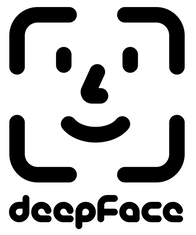   A Lightweight Face Recognition and Facial Attribute Analysis (Age, Gender, Emotion and Race) Library for Python

Credit: https://github.com/serengil/deepface

# Prepare Face Database

## Create face database LFW

In [ ]:
!(cd sample_data; tar -zxvf /content/drive/MyDrive/Colab\ Notebooks/lfw.tgz) 
!(cd sample_data/lfw; ls |wc -l)



## Copy backup of pre-build model, re-generate it for new images




In [2]:
!cp /content/drive/MyDrive/Colab\ Notebooks/lfw/representations*.pkl /content/sample_data/lfw/

# Install required packages

In [3]:
!pip install deepface

     |████████████████████████████████| 61 kB 5.4 MB/s 
     |████████████████████████████████| 2.3 MB 34.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.1-py3-none-any.whl size=9920 sha256=26fb09e18bc9120097af1198aa75c9241cbac8fae38a6e991f5837b9a5b84504
  Stored in directory: /root/.cache/pip/wheels/f2/8d/0b/2e7e6c725f898bd7ef654b660528e459a4d79f3a68976ca9fc
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


# Import packages

In [4]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt


Directory  /root /.deepface created
Directory  /root /.deepface/weights created


# Facial Recognition
## A modern face recognition pipeline consists of 4 common stages: detect, align, represent and verify. Deepface handles all these common stages in the background. You can just call its verification, find or analysis function with a single line of code.

In [29]:
test_location = "/content/drive/MyDrive/Colab Notebooks/sample_images/"
lfw_location = "/content/sample_data/lfw/"
medb_location = "/content/drive/MyDrive/Colab Notebooks/sample_images/me_db1/"

img1_path = medb_location+"me_now.jpg"
img2_path = medb_location+"me_past5.jpg"

kwang_img_path = medb_location+"กวาง_abnormal.jpg"
biden_img_path = test_location+"biden.jpg"
obama_img_path = test_location+"obama.jpg"
britney_img_path = test_location+"britney_spears1.jpg"
christian_bale = test_location+"christian_bale1.jpg"



## Detection



In [6]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
detectors = ["retinaface", "mtcnn", "opencv", "ssd", "dlib"]


Text(0.5, 1.0, 'Past')

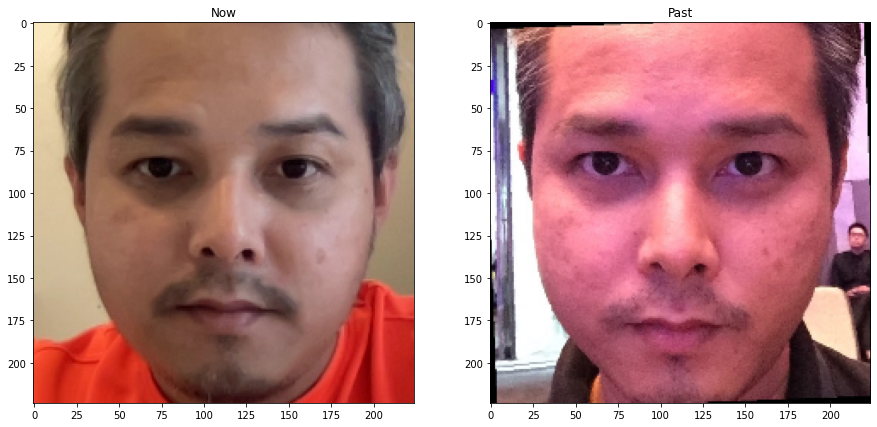

In [37]:
img1 = DeepFace.detectFace(img1_path)
img2 = DeepFace.detectFace(img2_path)
fig = plt.figure(figsize=(15, 15))
rows = 1; columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(img1)
plt.axis('on')
plt.title("Now")
fig.add_subplot(rows, columns, 2)
plt.imshow(img2)
plt.axis('on')
plt.title("Past")

## Verification


### 1:1
### Compare two images

In [9]:
similarity_metric = ["cosine", "euclidean", "euclidean_l2"]

In [38]:
def verify(img1_path, img2_path, model_name):

  result = DeepFace.verify(img1_path, img2_path, model_name) # default VGG-Face

  print("result:", result)
  
  if result["verified"]:
    print("They are same.")
  else:
    print("They are not same!!!")



In [39]:
verify(img1_path, img2_path, models[0])

result: {'verified': True, 'distance': 0.12101481023848037, 'max_threshold_to_verify': 0.4, 'model': 'VGG-Face', 'similarity_metric': 'cosine'}
They are same.


### 1:N
### Search image from face database

Already built model is passed
There are  13233  representations found in  representations_vgg_face.pkl


Analyzing: 100%|██████████| 1/1 [00:16<00:00, 16.38s/it]


find function lasts  18.956220865249634  seconds


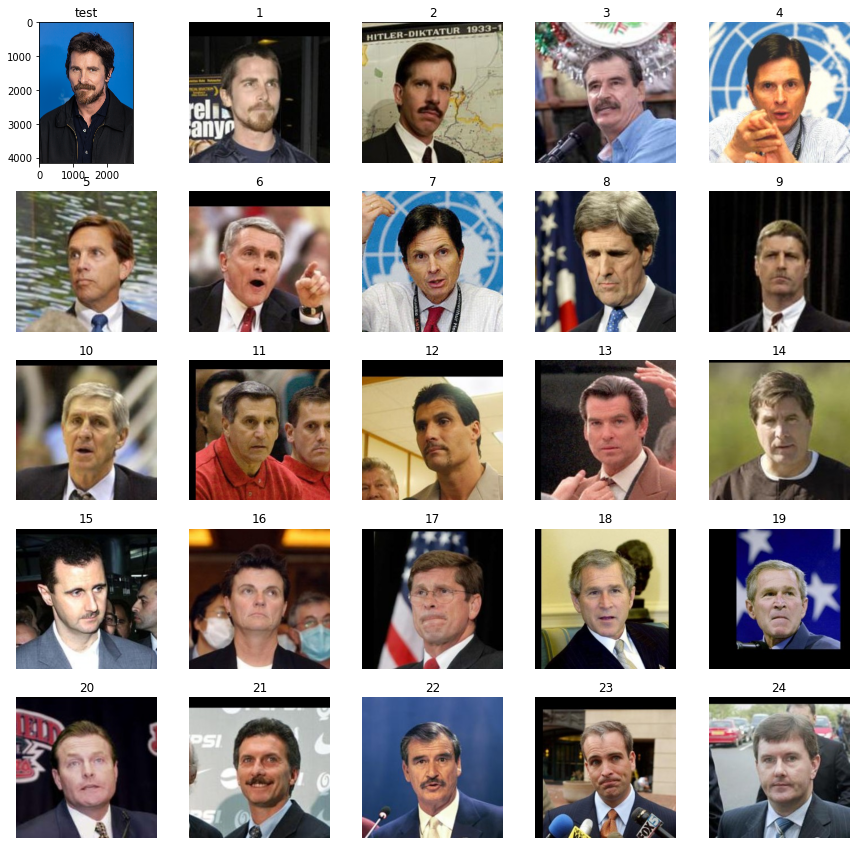

In [35]:
repres_model = DeepFace.build_model(models[0])
test_img_path = christian_bale

df = DeepFace.find(test_img_path, 
                   lfw_location,
                   model=repres_model, 
                   model_name=models[0], 
                   distance_metric=similarity_metric[0], 
                   detector_backend=detectors[2], 
                   enforce_detection=0,
                   prog_bar=0)

fig = plt.figure(figsize=(15, 15))
rows = 5
columns = 5

fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(cv2.imread(test_img_path), cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.title("test")

for row in df.itertuples(index=True, name=None):
  fig.add_subplot(rows, columns, row[0]+2)
  plt.imshow(cv2.cvtColor(cv2.imread(row[1]), cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(row[0]+1)
  if (rows*columns) == (row[0]+2):
    break


## Analyse

In [24]:
obj = DeepFace.analyze(img1_path)

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5


facial_expression_model_weights.h5 will be downloaded...


100%|██████████| 5.98M/5.98M [00:00<00:00, 134MB/s]
Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5


age_model_weights.h5 will be downloaded...


100%|██████████| 539M/539M [00:05<00:00, 94.5MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:07<00:00, 76.4MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:05<00:00, 93.4MB/s]
Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


In [ ]:
obj

# Real-time Analytis